In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Visualizing the initial one

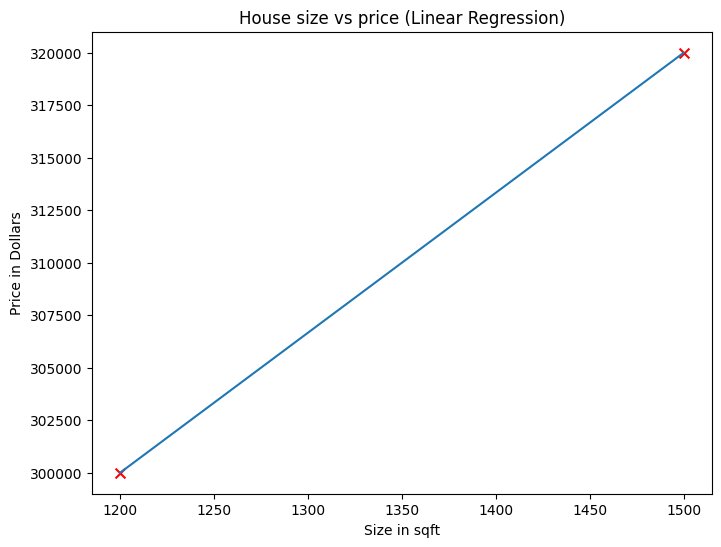

In [3]:
x_train = [[1200], [1500]]
y_train = [300000, 320000]
# x_train = np.array([[1200], [1500], [2000], [1800], [2500], [3000], [2200], [2700]])
# y_train = np.array([300000, 320000, 450000, 400000, 550000, 600000, 480000, 700000])
plt.figure(figsize  =(8,6))
plt.scatter(x_train, y_train, s= 50, marker ='x', c = 'red')
plt.plot(x_train, y_train)
# plt.plot(x_train, lr.predict(x_train))
plt.title('House size vs price (Linear Regression)')
plt.xlabel('Size in sqft')
plt.ylabel('Price in Dollars')
plt.show()

# Fitting Linear regression model

In [4]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr)
lr.predict([[1940]])

LinearRegression()


array([349333.33333333])

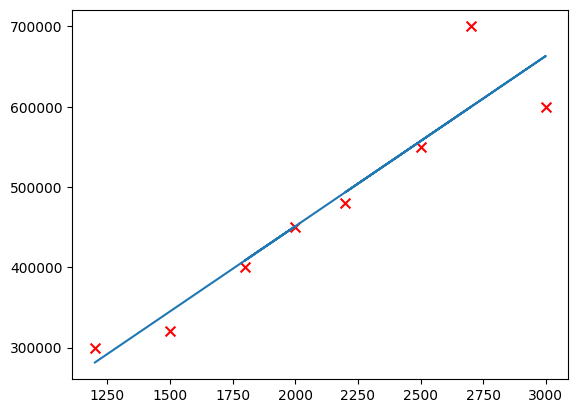

In [19]:
#Out experiment
lr2 = LinearRegression()
lr2.fit(X_cls, y_cls)
plt.scatter(X, y, marker = 'x', s = 50, c = 'red')
plt.plot(X, lr2.predict(X_cls))
plt.show()

# Initial Data

In [5]:
X_initial = np.array([1200, 1500])
y_initial = np.array([300000, 320000])

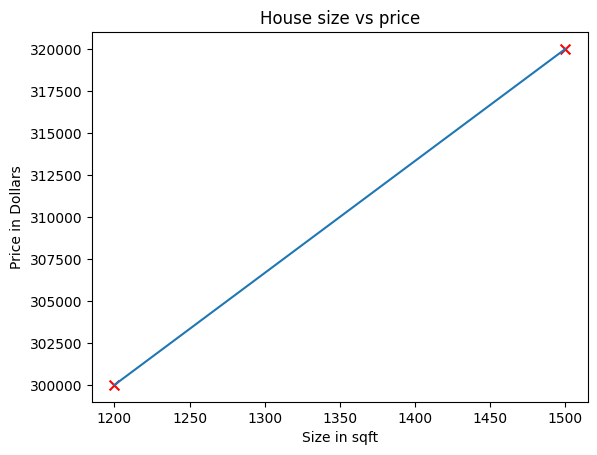

In [6]:
plt.scatter(X_initial, y_initial, s= 50, marker ='x', c = 'red')
plt.plot(X_initial, y_initial)
plt.title('House size vs price')
plt.xlabel('Size in sqft')
plt.ylabel('Price in Dollars')
plt.show()

In [7]:
#Training and Prediction for 1940 sample
n = len(X_initial)
m = n*np.sum(X_initial*y_initial) - np.sum(X_initial)*np.sum(y_initial)
m_denominator = n * np.sum(X_initial**2) - (np.sum(X_initial))**2
m = m / m_denominator

c = (np.sum(y_initial) - m*(np.sum(X_initial))) / n

# So the Equation of line is
y_line = m*(1940) + c
print("Price of house at 1940sqft (initial):", y_line)
print(m)
print(c)

Price of house at 1940sqft (initial): 349333.3333333334
66.66666666666667
220000.0


# Updted Data

In [8]:
X = np.array([1200, 1500, 2000, 1800, 2500, 3000, 2200, 2700])
y = np.array([300000, 320000, 450000, 400000, 550000, 600000, 480000, 700000])

# Visualization of updated data

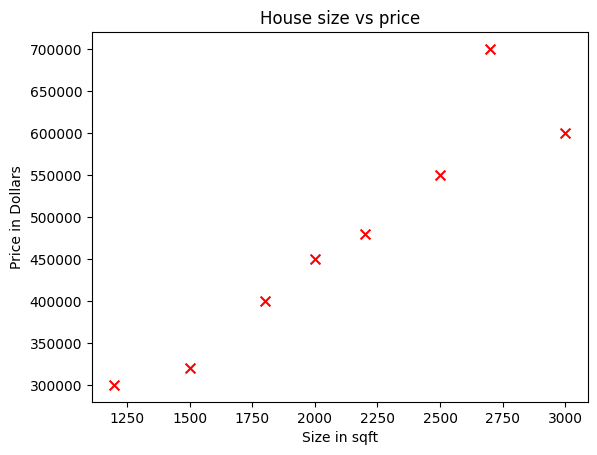

In [9]:
plt.scatter(X, y, s= 50, marker ='x', c = 'red')
plt.title('House size vs price')
plt.xlabel('Size in sqft')
plt.ylabel('Price in Dollars')
plt.show()

In [12]:
n = len(X)
m = n*np.sum(X*y) - np.sum(X)*np.sum(y)
m_denominator = n * np.sum(X**2) - (np.sum(X))**2
m = m / m_denominator

c = (np.sum(y) - m*(np.sum(X))) / n

# So the equation of line is below
def pred(x):
    y_line = m*(x) + c
    return y_line
# def pred(x):
#     for i in range(len(x)):
#         y_line = m*(x[i]) + c
#         return y_line

print(m)
print(c)
pred(1940)

212.17057977958794
26789.650215620466


438400.57498802105

In [12]:
upd_pred = []
for i in range(len(X)):
    upd_pred.append(pred(X[i]))

upd_pred

[281394.34595112596,
 345045.5198850024,
 451130.80977479636,
 408696.69381887873,
 557216.0996645903,
 663301.3895543844,
 493564.92573071393,
 599650.215620508]

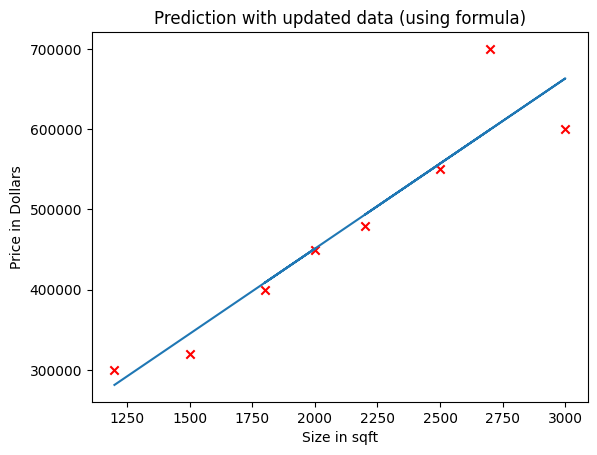

In [13]:
plt.scatter(X, y, marker = 'x', c = 'r')
plt.plot(X, upd_pred)
plt.xlabel("Size in sqft")
plt.ylabel("Price in Dollars")
plt.title("Prediction with updated data (using formula)")
plt.show()

# Closed Form
Implementing closed form. For this we use linear algebra in numpy. So for this I need to make the data into a matrix form basically 2d array

In [17]:
# X_cls = np.array([[1200], [1500]])
X_cls = np.array([[1200], [1500], [2000], [1800], [2500], [3000], [2200], [2700]])
y_cls = np.array([300000, 320000, 450000, 400000, 550000, 600000, 480000, 700000])

In [19]:
theta = np.linalg.inv(X_cls.T @ X_cls) @ X_cls.T @ y
print("Predictions using closed or vectorized form: ", theta)

Predictions using closed or vectorized form:  [223.98851475]


In [20]:
def final_theta(x):
    y_cls = np.dot(x, theta)
    return y_cls
x = final_theta(1940)
print(x)

[434537.71861133]


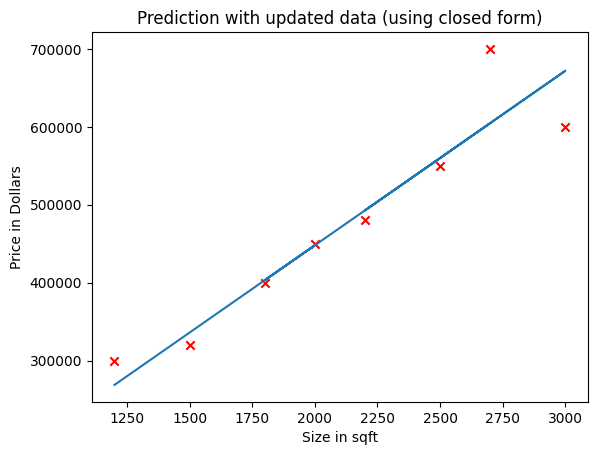

In [43]:
plt.scatter(X_cls, y, marker = 'x', c = 'r')
plt.plot(X_cls, final_theta(X_cls))
plt.xlabel("Size in sqft")
plt.ylabel("Price in Dollars")
plt.title("Prediction with updated data (using closed form)")
plt.show()

In [59]:
#Price of house of size 1940 sqft
price = final_theta(1940)
print("Price of house of size 1940 sqft (closed form): ", price)

Price of house of size 1940 sqft (closed form):  [434537.71861133]


In [34]:
y_vec = np.dot(m, X_cls)
y_vec_final = y_vec + c
y_vec_final

array([[281394.34595113],
       [345045.519885  ],
       [451130.8097748 ],
       [408696.69381888],
       [557216.09966459],
       [663301.38955438],
       [493564.92573071],
       [599650.21562051]])